# Problem Statement

In [1]:
#Check the current working Diectory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\6.SalesPrediction'

In [2]:
#Load the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the train and test data:
train_data = pd.read_csv("train.csv",engine="python")
test_data = pd.read_csv("test.csv",engine="python")

In [4]:
#Check the header for train data:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
#Check the header for test data:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#Check the tail for the train Data:
train_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [7]:
#Check the tail(last 5 records or observations) for the test data:
test_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN


In [8]:
#Observations: Data is loaded Properly:

# Check the dimension:

In [9]:
#Check the dimension for the train and test data:
print("Dimension for the train_data:",train_data.shape)
print("Dimension fot the test_data:",test_data.shape)

Dimension for the train_data: (550068, 12)
Dimension fot the test_data: (233599, 11)


In [10]:
#Check the Column Names:
print(train_data.columns)
print("------------------------------------------------------------------")
print(test_data.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
------------------------------------------------------------------
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [11]:
#Check the attribute types of train_data and test_data:
print("Attributes information about train_data:")
print(train_data.dtypes)
print("--------------------------------------------------------------")
print("Attributes information about test_data:")
print(test_data.dtypes)

Attributes information about train_data:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
--------------------------------------------------------------
Attributes information about test_data:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Produc

In [12]:
#Convert into appropriate data types in train_data:
train_data[["Marital_Status"]] = train_data[["Marital_Status"]].astype(object) 
#Convert into appropriate data types in test_data:
test_data[["Marital_Status"]] = test_data[["Marital_Status"]].astype(object) 

In [13]:
train_data.dtypes


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [14]:
test_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [15]:
print("Train_data attribute informations:",train_data.info())
print("----------------Separator-----------------------------")
print("Test_data attribute informations:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  object 
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB
Train_data att

# Summary of the Dataset:

In [16]:
#Describe the numerical data in train data:
print("Summary of the Numerical data in train_data:")
train_data.describe()

Summary of the Numerical data in train_data:


,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
#Describe the numerical data in test data:
print("Summary of the Numerical data in test_data:")
test_data.describe()

Summary of the Numerical data in test_data:


,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,18.000000,18.000000,18.000000


In [18]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
train_data.describe(include="object")

Summary of the Categorical data in train_data:


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2
top,P00265242,M,26-35,B,1,0
freq,1880,414259,219587,231173,193821,324731


In [19]:
#Describe the categorical data in test data:
print("Summary of the Categorical data in test_data:")
test_data.describe(include="object")

Summary of the Categorical data in test_data:


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,233599,233599,233599,233599,233599,233599
unique,3491,2,7,3,5,2
top,P00265242,M,26-35,B,1,0
freq,829,175772,93428,98566,82604,137807


In [20]:
#Separate the numerical and categorical attributes:
num_attr = ["Occupation","Product_Category_1","Product_Category_2","Product_Category_3"]
cat_attr = ["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]

In [21]:
#Make separate dataframe for num_attr and cat_attr for train_data:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [22]:
train_num_attr.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,10,3,NaN,NaN
1,10,1,6.0,14.0
2,10,12,NaN,NaN
3,10,12,14.0,NaN
4,16,8,NaN,NaN


In [23]:
train_cat_attr.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
0,F,0-17,A,2,0
1,F,0-17,A,2,0
2,F,0-17,A,2,0
3,F,0-17,A,2,0
4,M,55+,C,4+,0


In [24]:
#Create dataframe for test data with num_attr and cat_attr:

In [25]:
#make separate dataframe for num_attr and cat_attr for test_data:
test_num_attr = test_data[num_attr]
test_cat_attr = test_data[cat_attr]

In [26]:
test_num_attr.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,7,1,11.0,NaN
1,17,3,5.0,NaN
2,1,5,14.0,NaN
3,1,4,9.0,NaN
4,1,4,5.0,12.0


In [27]:
test_cat_attr.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
0,M,46-50,B,2,1
1,M,26-35,C,0,0
2,F,36-45,B,4+,1
3,F,36-45,B,4+,1
4,F,26-35,C,1,0


# Missing Value Treatment:

In [28]:
#Missing values in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())

Occupation                 0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
dtype: int64
--------------------------
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64


In [29]:
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

Occupation             0.000000
Product_Category_1     0.000000
Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64
--------------------------
Gender                        0.0
Age                           0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
dtype: float64


In [30]:
#Observation: Prodict_Category_2 and Product_Category_3 has Missing Values more than 30% so as per me We must drop otherwise 
#Altered data would be filled.
#CASE2:--------------------------------------------------------

In [31]:
#Drop the "Product_Category_2", "Product_Category_3" from train_data:
train_num_attr.drop(columns = ["Product_Category_2","Product_Category_3"],inplace=True)
train_num_attr.head()

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Occupation,Product_Category_1
0,10,3
1,10,1
2,10,12
3,10,12
4,16,8


In [32]:
#Check missing values once again after Imputation  in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())
#Observation:It is filled.

Occupation            0
Product_Category_1    0
dtype: int64
--------------------------
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64


In [33]:
#Missing values in test_num_attr and test_cat_attr in Percentage:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Occupation             0.000000
Product_Category_1     0.000000
Product_Category_2    30.969311
Product_Category_3    69.590195
dtype: float64
--------------------------
Gender                        0.0
Age                           0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
dtype: float64


In [34]:
#Observation: Prodict_Category_2 and Product_Category_3 has Missing Values more than 30% so as per me We must drop otherwise 
#Altered data would be filled.

In [35]:
#Drop both the columns:
test_num_attr.drop(columns = ["Product_Category_2","Product_Category_3"],inplace=True)
test_num_attr.head()

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Occupation,Product_Category_1
0,7,1
1,17,3
2,1,5
3,1,4
4,1,4


In [36]:
train_num_attr

,Occupation,Product_Category_1
0,10,3
1,10,1
2,10,12
3,10,12
4,16,8
...,...,...
550063,13,20
550064,1,20
550065,15,20
550066,1,20


In [37]:
num_attr

['Occupation',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

# Outlier Treatment:

<AxesSubplot:>

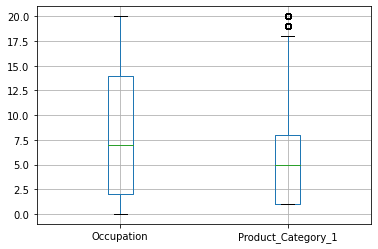

In [38]:
#Use the Box and Whisker Plot in train_num_attr:

train_num_attr.boxplot(column = ["Occupation","Product_Category_1"])

In [39]:
#There are only 1 -2 records as oulier so we can ignore them.

<AxesSubplot:>

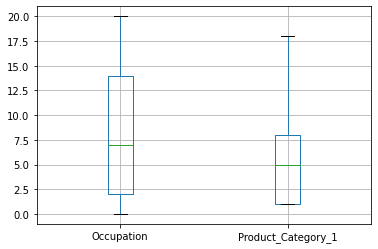

In [40]:
#Use the Box and Whisker Plot in test_num_attr:

test_num_attr.boxplot(column = ["Occupation","Product_Category_1"])

In [41]:
#There is no outlier present in test data.

# Scaling through Standardizations:

In [42]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()

In [43]:
#Scale the train_num_attr  data(Only Numerical data):
train_num_attr[['Occupation']] = StdScale.fit_transform(train_num_attr[['Occupation']])
train_num_attr[['Product_Category_1']] = StdScale.fit_transform(train_num_attr[['Product_Category_1']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [44]:
#Check the transformed train_num_attr:
train_num_attr.head()

,Occupation,Product_Category_1
0,0.294864,-0.610809
1,0.294864,-1.118912
2,0.294864,1.675656
3,0.294864,1.675656
4,1.214734,0.659449


In [45]:
#Scale the train_num_attr  data(Only Numerical data):
test_num_attr[['Occupation']] = StdScale.fit_transform(test_num_attr[['Occupation']])
test_num_attr[['Product_Category_1']] = StdScale.fit_transform(test_num_attr[['Product_Category_1']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [46]:
#Check the transformed test_num_attr:
test_num_attr.head()

,Occupation,Product_Category_1
0,-0.166445,-1.144571
1,1.367031,-0.609292
2,-1.086530,-0.074014
3,-1.086530,-0.341653
4,-1.086530,-0.341653


In [47]:
#Encode the categorical data of train_cat_attr data:
dummies1 = pd.get_dummies(train_cat_attr[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years',
       'Stay_In_Current_City_Years', 'Marital_Status']],drop_first=True)
dummies1.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [48]:
#Encode the categorical data of test_cat_attr data:
dummies2 = pd.get_dummies(test_cat_attr[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years',
       'Stay_In_Current_City_Years', 'Marital_Status']],drop_first=True)
dummies2.head()


,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [49]:
#Combine the scaled train_num_attr and dummies1:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
train_final = pd.concat([train_num_attr,dummies1,train_data.Purchase],axis=1)
train_final.head()

,Occupation,Product_Category_1,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1,Purchase
0,0.294864,-0.610809,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,8370
1,0.294864,-1.118912,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,15200
2,0.294864,1.675656,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1422
3,0.294864,1.675656,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1057
4,1.214734,0.659449,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,7969


In [50]:
#Combine the scaled train_num_attr and dummies1:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
test_final = pd.concat([test_num_attr,dummies2],axis=1)
test_final.head()

,Occupation,Product_Category_1,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,-0.166445,-1.144571,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,1.367031,-0.609292,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-1.086530,-0.074014,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
3,-1.086530,-0.341653,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
4,-1.086530,-0.341653,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [51]:
#New Dimesnion for the train_final and test_final data:
print("Dimension for the train_final:",train_final.shape)
print("Dimension for the test_final:",test_final.shape)

Dimension for the train_final: (550068, 21)
Dimension for the test_final: (233599, 20)


In [52]:
#Train_columns:
train_final.columns

Index(['Occupation', 'Product_Category_1', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Marital_Status_1', 'Purchase'],
      dtype='object')

In [53]:
#Test Columns:
test_final.columns

Index(['Occupation', 'Product_Category_1', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Marital_Status_1'],
      dtype='object')

In [56]:
#Observation:
#It is a regression problem so we need to predict the "Purchase"

In [57]:
#Drop the "Purchase" in train_final data:
train_final.drop(["Purchase"],axis=1,inplace=True)

In [60]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_final,train_data[["Purchase"]],test_size=0.20,random_state=123)

In [61]:
print(train_final.shape)
print(train_data[["Purchase"]].shape)

(550068, 20)
(550068, 1)


In [64]:
X_train.shape,y_train.shape

((440054, 20), (440054, 1))

# 1. Linear Regression:

In [66]:
#Build the LinearRegression:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
#Build the Model:
LR.fit(X_train,y_train)

LinearRegression()

In [68]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LR.predict(X_train)

In [70]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_lr = LR.predict(X_test)
pred_test_lr = LR.predict(test_final)

In [74]:
#Check the RMSE Metrics on X_train using which model was built:
from sklearn.metrics import mean_absolute_error,mean_squared_error
result_X_train_lr =np.sqrt( mean_squared_error(pred_X_train,y_train))
result_X_test_lr = np.sqrt( mean_squared_error(pred_X_test_log,y_test))
print("-----RMSE(Root Mean Squared Error) on Train Data-----------")
print(result_X_train_lr)
print("-----RMSE(Root Mean Squared Error) on Validation Data------")
print(result_X_test_lr)
#mean_squared_report()

-----RMSE(Root Mean Squared Error) on Train Data-----------
4697.498034095645
-----RMSE(Root Mean Squared Error) on Validation Data------
4703.410221400615


In [102]:
#To Prepare for the Submission file last two columns are "User_ID" and "Product_ID".
User_Product = pd.concat([test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)
User_Product.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [103]:
#Concat the "Purchase" and User_ID and Product_ID:
Sub_LR = pd.concat([pd.DataFrame(pred_test_lr),User_Product],axis=1)

In [104]:
Sub_LR.head()

,0,User_ID,Product_ID
0,11297.877217,1000004,P00128942
1,10886.430520,1000009,P00113442
2,8878.627217,1000010,P00288442
3,9339.627217,1000010,P00145342
4,9860.002011,1000011,P00053842


In [105]:
#Rename the Columns as per the Submission files:
Sub_LR.rename(columns = {0:"Purchase"},inplace=True)

In [107]:
#Export the File for submission:
Sub_LR.to_csv("1.LR.csv",index=False)

In [108]:
#Portal Result:
#Your score for this submission is : 4714.59923783024.

# 2. KNN Regression:

In [111]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsRegressor
KNN_R = KNeighborsRegressor(n_neighbors = 3,metric = "minkowski",p=2)
#Build the Model:
KNN_R.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [112]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_R.predict(X_train)

In [113]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_R.predict(X_test)
pred_test_KNN = KNN_R.predict(test_final)

In [115]:
#Check the RMSE Metrics on X_train using which model was built:
from sklearn.metrics import mean_absolute_error,mean_squared_error
result_X_train_KNNR =np.sqrt( mean_squared_error(pred_X_train_KNN,y_train))
result_X_test_KNNR = np.sqrt( mean_squared_error(pred_X_test_KNN,y_test))
print("-----RMSE(Root Mean Squared Error) on Train Data-----------")
print(result_X_train_KNNR)
print("-----RMSE(Root Mean Squared Error) on Validation Data------")
print(result_X_test_KNNR)
#mean_squared_report()

-----RMSE(Root Mean Squared Error) on Train Data-----------
3221.1027845925696
-----RMSE(Root Mean Squared Error) on Validation Data------
3403.768726130445


In [117]:
#Concat the "Purchase" and User_ID and Product_ID:
Sub_KNNR = pd.concat([pd.DataFrame(pred_test_KNN),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [118]:
Sub_KNNR.head()

,0,User_ID,Product_ID
0,13194.666667,1000001,P00069042
1,11585.666667,1000001,P00248942
2,8093.666667,1000001,P00087842
3,2116.000000,1000001,P00085442
4,1872.666667,1000002,P00285442


In [119]:
#Rename the Columns as per the Submission files:
Sub_LR.rename(columns = {0:"Purchase"},inplace=True)

In [120]:
#Export the File for submission:
Sub_LR.to_csv("2_KNN.csv",index=False)

In [ ]:
#Portal Result:
#Your score for this submission is : 4714.59923783024.

# 3. Decision Tree Regressor:

In [121]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [122]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [123]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [124]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_DT =  np.sqrt(mean_squared_error(pred_X_train_DT,y_train))
result_X_test_DT =   np.sqrt(mean_squared_error(pred_X_test_DT,y_test))
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)


-----Result on Train Data-----------
2769.555017944288
-----Result on Validation Data------
2961.418720014869


In [131]:
#Concat the test_employee_id and pred_test:
Sub_DT = pd.concat([pd.DataFrame(pred_test_DT),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [132]:
Sub_DT.head()

,0,User_ID,Product_ID
0,16702.384615,1000004,P00128942
1,10068.818182,1000009,P00113442
2,7309.758065,1000010,P00288442
3,2466.500000,1000010,P00145342
4,2203.166667,1000011,P00053842


In [133]:
Sub_DT.rename(columns={0:"Purchase"},inplace=True)

In [134]:
Sub_DT.head()

,Purchase,User_ID,Product_ID
0,16702.384615,1000004,P00128942
1,10068.818182,1000009,P00113442
2,7309.758065,1000010,P00288442
3,2466.500000,1000010,P00145342
4,2203.166667,1000011,P00053842


In [135]:
#Export to the local system:
Sub_DT.to_csv("3DTRegressor.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 3354.3920418046055.

# 4. Random Forest Regression:

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [137]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [138]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [139]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_rf = np.sqrt(mean_squared_error(pred_X_train_rf,y_train))
result_X_test_rf =  np.sqrt(mean_squared_error(pred_X_test_rf,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#root_mean_squared_error_report()

--------------------------Result on Train Data-----------
2774.985640686777
--------------------------Result on Validation Data------
2933.2173099999973


In [140]:
#Concat the test_employee_id and pred_test:
Sub_RF = pd.concat([pd.DataFrame(pred_test_rf),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [141]:
Sub_RF.head()

,0,User_ID,Product_ID
0,16675.534742,1000004,P00128942
1,9908.189437,1000009,P00113442
2,7311.595305,1000010,P00288442
3,2423.755782,1000010,P00145342
4,2197.426745,1000011,P00053842


In [144]:
Sub_RF.rename(columns={0:"Purchase"},inplace=True)

In [155]:
#Export to the local system:
Sub_RF.to_csv("4RFRegressor.csv",index=False)

In [156]:
#Result on Portal:
#Your score for this submission is : 3299.66036974283.

# 5. GradientBoosting Classifier:

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [179]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)#Concat the test_ID and pred_test:


In [180]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = GB.predict(X_test)
pred_test_GB = GB.predict(test_final)

In [181]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_GB = np.sqrt(mean_squared_error(pred_X_train_GB,y_train))
result_X_test_GB = np.sqrt(mean_squared_error(pred_X_test_GB,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#RMSE_report()

--------------------------Result on Train Data-----------
3009.6553325922923
--------------------------Result on Validation Data------
3007.5754999176747


In [185]:
#Concat the test_employee_id and pred_test:
Sub_GB = pd.concat([pd.DataFrame(pred_test_GB),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [186]:
Sub_GB.head()

,0,User_ID,Product_ID
0,13509.856243,1000004,P00128942
1,10303.960217,1000009,P00113442
2,6220.250548,1000010,P00288442
3,2577.872849,1000010,P00145342
4,2922.448400,1000011,P00053842


In [187]:
Sub_GB.rename(columns = {0:"Purchase"},inplace=True)

In [188]:
Sub_GB.to_csv("5.Sub_GB.csv",index=False)

In [158]:
#Result on Portal:
#Your score for this submission is : 3341.886079311225.

# 6.Hist Gradient Boosting Regressor

In [159]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
HGB = HistGradientBoostingRegressor()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingRegressor()

In [160]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [161]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [162]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_HGB = np.sqrt(mean_squared_error(pred_X_train_HGB,y_train))
result_X_test_HGB = np.sqrt(mean_squared_error(pred_X_test_HGB,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

--------------------------Result on Train Data-----------
2970.084692029897
--------------------------Result on Validation Data------
2973.191972212529


In [174]:
#Concat the test_employee_id and pred_test:
Sub_HGB = pd.concat([pd.DataFrame(pred_test_HGB),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [175]:
Sub_HGB.head()

,0,User_ID,Product_ID
0,15040.846061,1000004,P00128942
1,10215.442823,1000009,P00113442
2,6332.292325,1000010,P00288442
3,2562.582182,1000010,P00145342
4,2438.204529,1000011,P00053842


In [176]:
Sub_HGB.rename(columns={0:"Purchase"},inplace=True)

In [177]:
Sub_HGB.head()

,Purchase,User_ID,Product_ID
0,15040.846061,1000004,P00128942
1,10215.442823,1000009,P00113442
2,6332.292325,1000010,P00288442
3,2562.582182,1000010,P00145342
4,2438.204529,1000011,P00053842


In [178]:
Sub_HGB.to_csv("6.Sub_HGB.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 3306.375933771161.

# 7. Adaboost Regressor:

In [189]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
#Build Model:
AD = AD.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [190]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [191]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [193]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_AD = np.sqrt(mean_squared_error(pred_X_train_AD,y_train))
result_X_test_AD = np.sqrt(mean_squared_error(pred_X_test_AD,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#Regression_report()

--------------------------Result on Train Data-----------
3889.10581363222
--------------------------Result on Validation Data------
3893.5583241521836


In [195]:
#Concat the Pred_Purchase and User_ID and Product_ID:
Sub_AD = pd.concat([pd.DataFrame(pred_test_AD),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [196]:
Sub_AD.head()

,0,User_ID,Product_ID
0,12962.625773,1000004,P00128942
1,10109.239960,1000009,P00113442
2,6953.010501,1000010,P00288442
3,6953.010501,1000010,P00145342
4,6953.010501,1000011,P00053842


In [197]:
Sub_AD.rename(columns = {0:"Purchase"},inplace=True)

In [198]:
Sub_AD.head()

,Purchase,User_ID,Product_ID
0,12962.625773,1000004,P00128942
1,10109.239960,1000009,P00113442
2,6953.010501,1000010,P00288442
3,6953.010501,1000010,P00145342
4,6953.010501,1000011,P00053842


In [201]:
Sub_AD.to_csv("7.Sub_AD.csv",index=False)

In [202]:
#Result On POrtal:
#Your score for this submission is : 3925.2037515060856.

# 8.XGBoost Regressor:

In [203]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

1.2.0


In [205]:
#Xgboost Regressor:
import xgboost
from xgboost import XGBRegressor
XGB = XGBRegressor()
#Build the Model:
XGB.fit(X_train.values,y_train.values) #USe  values here otherwise it might throw an error

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [207]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train.values)#use.values

In [208]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test.values)
pred_test_XGB = XGB.predict(test_final.values)

In [209]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_XGB = np.sqrt(mean_squared_error(pred_X_train_XGB,y_train))
result_X_test_XGB = np.sqrt(mean_squared_error(pred_X_test_XGB,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#RMSE_report()

--------------------------Result on Train Data-----------
2917.1494029744927
--------------------------Result on Validation Data------
2931.9844369358457


In [227]:
#Concat the test_employee_id and others:
Sub_XGB = pd.concat([pd.DataFrame(pred_test_XGB),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [228]:
Sub_XGB.head()

,0,User_ID,Product_ID
0,15938.320312,1000004,P00128942
1,10281.770508,1000009,P00113442
2,7011.893066,1000010,P00288442
3,3306.184814,1000010,P00145342
4,2579.538574,1000011,P00053842


In [229]:
Sub_XGB.rename(columns={0:"Purchase"},inplace=True)

In [230]:
Sub_XGB.to_csv("8.Sub_XGB.csv",index=False)

In [231]:
#Result on Portal:
#Your score for this submission is : 3278.650037936432.

# 9.LIGHTGBM Regressor:

In [220]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [221]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

3.0.0


In [223]:
from lightgbm import LGBMRegressor
LGBM= LGBMRegressor()
#Building the Model:
LGBM.fit(X_train.values,y_train.values) #Here also use [X_train>values]

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMRegressor()

In [224]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [225]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [226]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_LGBM = np.sqrt(mean_squared_error(pred_X_train_LGBM,y_train))
result_X_test_LGBM = np.sqrt(mean_squared_error(pred_X_test_LGBM,y_test))
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

--------------------------Result on Train Data for LGBM:-----------
2969.231598943154
--------------------------Result on Validation Data LGBM:------
2971.85861854996


In [232]:
#Concat the test_employee_id and pred_test_SVC:
Sub_LGBM = pd.concat([pd.DataFrame(pred_test_LGBM),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

In [233]:
Sub_LGBM.head()

,0,User_ID,Product_ID
0,15215.392286,1000004,P00128942
1,10212.908368,1000009,P00113442
2,6343.306836,1000010,P00288442
3,2577.907997,1000010,P00145342
4,2431.688227,1000011,P00053842


In [234]:
Sub_LGBM.rename(columns={0:"Purchase"},inplace=True)

In [235]:
Sub_LGBM.head()

,Purchase,User_ID,Product_ID
0,15215.392286,1000004,P00128942
1,10212.908368,1000009,P00113442
2,6343.306836,1000010,P00288442
3,2577.907997,1000010,P00145342
4,2431.688227,1000011,P00053842


In [236]:
Sub_LGBM.to_csv("9.Sub_LGBM.csv",index=False)

In [243]:
#Result on Portal:
#Your score for this submission is : 3311.0462587906886.

# Support Vector machine:

In [ ]:
from sklearn.svm import SVR
#import "LinearSVC "
SVR = SVR()
#Model Building:
SVR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_SVR = SVR.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVR = SVR.predict(X_test)
pred_test_SVR = SVR.predict(test_final)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVR = SVR.predict(X_test)
pred_test_SVR = SVR.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import mean_squared_error
result_X_train_SVR = np.sqrt(mean_squared_error(pred_X_train_SVC,y_train))
result_X_test_SVR = np.sqrt(mean_squared_error(pred_X_test_SVC,y_test))
print("--------------------------Result on Train Data-----------")
print(result_X_train_SVR)
print("--------------------------Result on Validation Data------")
print(result_X_test_SVR)
#classification_report()

In [ ]:
#Concat the pred_test_LGBM and user and productid:
Sub_SVR = pd.concat([pd.DataFrame(pred_test_SVR),test_data[["User_ID"]],test_data[["Product_ID"]]],axis=1)

# 10.Gradient Boosting with CatBoost

In [ ]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [237]:
#Check the catboost version:
import catboost
print(catboost.__version__)

0.24.2


In [242]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier(depth = 6)
#Build the Model:
catb.fit(X_train.values,y_train.values)
#It would throw an error for this model. Add values
#Error:-CatBoostError: bad allocation :- Could accomodate into this memory

Learning rate set to 0.10793


CatBoostError: bad allocation